In [1]:
from ece470_lib import *
from IPython.display import clear_output
from time import time
inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4]#,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 0 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);
X=np.arange(-20,500,10);
# Y=X;
Y=np.array([0])
Z=np.arange(400,1020,10)
print (X.shape,Y.shape,Z.shape)

(52,) (1,) (62,)


In [2]:
%who 

Dist3D	 M	 S	 Tree	 X	 Y	 Z	 a0	 a1	 
a2	 a3	 a4	 a5	 adj_T	 bracket	 checkcollision	 checkselfcollision	 clear_output	 
evalJ	 evalT	 expm	 finalpos	 findIK	 fromPose	 goalRot	 inTOmm	 inv_bracket	 
isValidTheta	 logm	 matrix_linspace	 multi_transform	 norm	 np	 pinv	 q0	 q1	 
q2	 q3	 q4	 q5	 s0	 s1	 s2	 s3	 s4	 
s5	 sequential_Ts	 skew4	 time	 toPose	 toScrew	 toTs	 toolPos	 toolRot	 
validThetas	 


In [3]:
import matplotlib.pyplot as plt

ang= np.pi/2
validTheta, thetaMap = validThetas(X,Y,Z,S,M,goalRot,ang)

0.0 min until done


In [4]:
# %store thetaMap
# %store validTheta
%store -r thetaMap validTheta
# print(X.size,Y.size,Z.size)

Stored 'thetaMap' (list)
Stored 'validTheta' (ndarray)


In [5]:
# goalRot = np.eye(3);
# goalPos = np.array([[450],[0],[850]]);
# goalT = toPose(goalRot,goalPos);
# thetaMat,norm = findIK(goalT, S,M,max_iter=100);
# print(thetaMat)
# out = evalT(S,[0,20/180*np.pi,130/180*np.pi,-60/180*np.pi,0],M)
# rot,pos = fromPose(out)
# print(rot)
# print(pos)

In [6]:
# i=np.where(X==440)[0][0]
# j=0
# k=np.where(Z==840)[0][0]
# print(X[i],Y[j],Z[k])
# print(thetaMap[i][j][k])

In [7]:
# shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
# for i in range(shp[0]):
#     for j in range(shp[1]):
#         for k in range(shp[2]):
#             print([X[i],Y[j],Z[k]])
#             for thet in thetaMap[i][j][j]:
#                 print(thet)
#             print()

In [8]:
# count=0
# for i in range(validTheta.shape[0]):
#     for j in range(validTheta.shape[1]):
#         for k in range(validTheta.shape[2]):
#             if(validTheta[i,j,k]==0):
#                 print((X[i],Y[j],Z[k]));
#                 count+=1
                
# print("unreachable points =", count)

In [9]:
# print(thetaMap[0][0][0])

In [10]:
# from time import gmtime
# tmstop = gmtime()

In [11]:
# print(tmstop)

In [12]:
# print(isValidTheta([[159],[120]]))

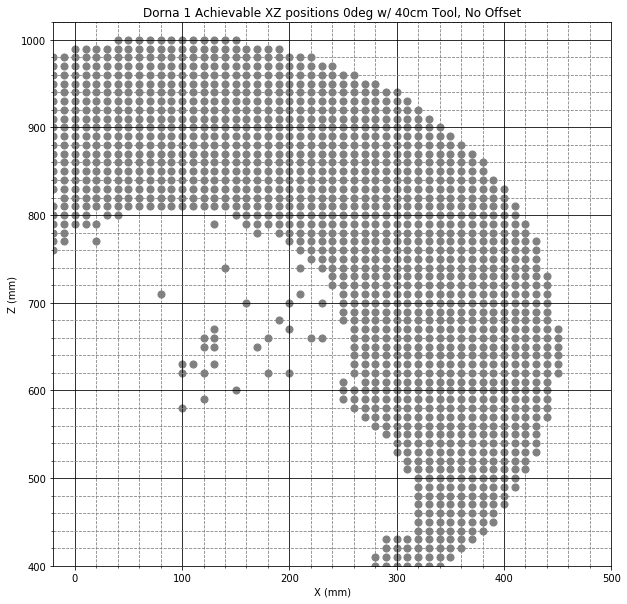

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
plt.xlim(-20,500)
plt.ylim(400,1020)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs=[]
zs=[]
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            if(validTheta[i,j,k]>0):
                xs.append(X[i])
                zs.append(Z[k])
#                 print(validTheta[i,j,k])
for i in range(len(zs)):
    zs[i]=zs[i]
# print(xs)
# print(zs)
plt.scatter(xs,zs,s=50,color='gray')
plt.title("Dorna 1 Achievable XZ positions 0deg w/ 40cm Tool 0cm Offset")
plt.savefig("XZ_SpatialFreedom0deg0cmOffset40cmTool.png")


In [18]:
# %store xs zs
%store -r xs zs

Stored 'xs' (ndarray)
Stored 'zs' (ndarray)


In [14]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,-sqrt(2)/2],[0,1,0],[sqrt(2)/2,0,sqrt(2)/2]]).transpose()
xs = np.array(xs)
zs = np.array(zs)

In [19]:
ang = np.pi/4
validThetaMinus45, thetaMapMinus45 = validThetas(X,Y,Z,S,M,goalRot,ang)

0.0 min until done


In [21]:
# %store validThetaMinus45
%store -r validThetaMinus45

Stored 'validThetaMinus45' (ndarray)


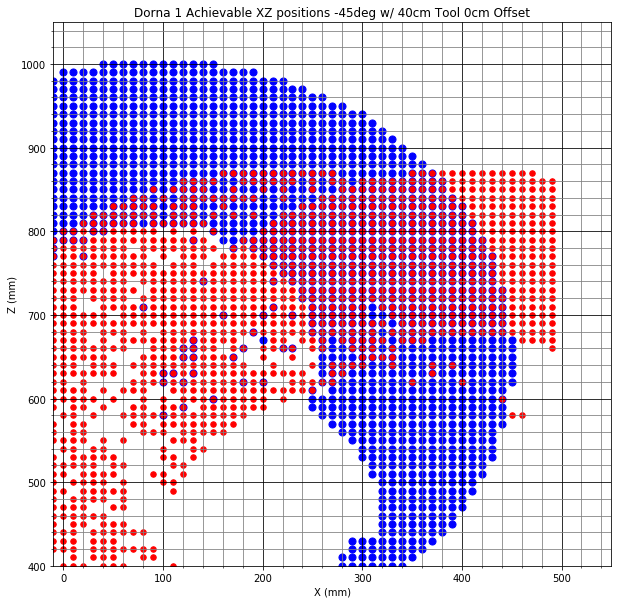

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs45=[]
zs45=[]
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            if(validThetaMinus45[i,j,k]>0):
                xs45.append(X[i])
                zs45.append(Z[k])
for i in range(len(zs45)):
    zs45[i]=zs45[i]
plt.scatter(xs,zs,s=50,color='blue')
plt.scatter(xs45,zs45,s=30,color='red')
def split(l1,l2):
    same=[]
    foundSame = np.zeros((len(l1),len(l2)))
    for i in range(len(ll)):
        for j in range(len(l2)):
            if(l1[i]==l2[j]):
                same.append(l1[i])
                foundSame[i,j]=1
    return same

plt.title("Dorna 1 Achievable XZ positions -45deg w/ 40cm Tool 0cm Offset")
plt.savefig("XZ_SpatialFreedomMinus45deg0cmOffset40cmTool.png")